## Desenvolvimento de um Modelo de Machine Learning

#### Importação da base de dados:
#### Análise dos Dados:
- Valores nulos ou faltantes: Não há
- Verificar Inconsistências
- Verificar Outliers;
- Correlação dos Dados com a Classe;
#### Preparação dos Dados:
- Escalonamento:
- Padronização:
- Undersampling ou Oversampling:
- Selecionando as melhores Colunas:
- Detecção de Colinearidad
#### Treinamento dos Algoritmos:
- Random Forest Classifier:
- Logistic Regression:
- Naive Bayes:
- K-Nearest Neighbors (KNN)
#### Otimização dos Modelos:
- GridSearch:
- K-Cross Validation
#### Importação do MELHOR modelo:


### 1. Importação das Bibliotecas e do Dataframe

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [89]:
df_cancer = pd.read_csv("data/Lung Cancer Dataset.csv")
df_cancer

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,0,1,1,0,0,1,60.700696,1,1,1,1,94.012495,0,1,1,0,YES
4996,80,0,1,1,1,1,1,50.751741,0,1,1,1,94.394968,0,0,0,0,YES
4997,51,1,0,0,1,0,0,61.063496,1,0,0,0,98.108901,0,0,0,1,NO
4998,76,1,0,1,0,0,0,48.662872,0,1,0,1,95.577773,1,0,0,0,NO


### 2. Análise dos Dados

In [90]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

- 0 means no
- 1 means yes

In [91]:
df_cancer['AGE'].describe()

count    5000.000000
mean       57.222800
std        15.799224
min        30.000000
25%        44.000000
50%        57.000000
75%        71.000000
max        84.000000
Name: AGE, dtype: float64

Column of Age has consistent datas: 
- age between 30 and 84; 
- Not null data or outliers;

In [92]:
df_cancer['GENDER'].describe()

count    5000.000000
mean        0.501200
std         0.500049
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: GENDER, dtype: float64

Column of Gender has consistent datas: 
- gender = 0 means man and 1 woman; 
- Not null data or outliers

In [93]:
df_cancer['SMOKING'].describe()

count    5000.000000
mean        0.666400
std         0.471546
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: SMOKING, dtype: float64

Column of Smoking has consistent datas: 
- Not null data or outliers;

In [94]:
df_cancer['FINGER_DISCOLORATION'].describe()

count    5000.0000
mean        0.6012
std         0.4897
min         0.0000
25%         0.0000
50%         1.0000
75%         1.0000
max         1.0000
Name: FINGER_DISCOLORATION, dtype: float64

Column of Finger Discoloarion has consistent datas: 
- Not null data or outliers;

In [95]:
df_cancer['MENTAL_STRESS'].describe()

count    5000.000000
mean        0.539800
std         0.498463
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: MENTAL_STRESS, dtype: float64

Column of Finger Mental Stress has consistent datas: 
- Not null data or outliers;

In [96]:
df_cancer['EXPOSURE_TO_POLLUTION'].describe()

count    5000.000000
mean        0.516000
std         0.499794
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: EXPOSURE_TO_POLLUTION, dtype: float64

Column of Finger Exposure to Pollution has consistent datas: 
- Not null data or outliers;

In [97]:
df_cancer['ENERGY_LEVEL'].describe()

count    5000.000000
mean       55.032043
std         7.913083
min        23.258308
25%        49.440685
50%        55.050421
75%        60.323320
max        83.046971
Name: ENERGY_LEVEL, dtype: float64

Column of Energy Level to Pollution has consistent datas: 
- Not null data or outliers;

In [98]:
df_cancer['IMMUNE_WEAKNESS'].describe()

count    5000.000000
mean        0.394800
std         0.488857
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: IMMUNE_WEAKNESS, dtype: float64

In [99]:
df_cancer['BREATHING_ISSUE'].describe()

count    5000.00000
mean        0.80040
std         0.39974
min         0.00000
25%         1.00000
50%         1.00000
75%         1.00000
max         1.00000
Name: BREATHING_ISSUE, dtype: float64

In [100]:
df_cancer['ALCOHOL_CONSUMPTION'].describe()

count    5000.000000
mean        0.354200
std         0.478318
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: ALCOHOL_CONSUMPTION, dtype: float64

In [101]:
df_cancer['THROAT_DISCOMFORT'].describe()

count    5000.000000
mean        0.698200
std         0.459085
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: THROAT_DISCOMFORT, dtype: float64

In [102]:
df_cancer['OXYGEN_SATURATION'].describe()

count    5000.000000
mean       94.991029
std         1.481048
min        89.923133
25%        93.973176
50%        94.974073
75%        95.989272
max        99.795786
Name: OXYGEN_SATURATION, dtype: float64

In [103]:
df_cancer['CHEST_TIGHTNESS'].describe()

count    5000.000000
mean        0.600600
std         0.489824
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CHEST_TIGHTNESS, dtype: float64

In [104]:
df_cancer['FAMILY_HISTORY'].describe()

count    5000.000000
mean        0.301800
std         0.459085
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: FAMILY_HISTORY, dtype: float64

In [105]:
df_cancer['SMOKING_FAMILY_HISTORY'].describe()

count    5000.000000
mean        0.204000
std         0.403009
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SMOKING_FAMILY_HISTORY, dtype: float64

In [106]:
df_cancer['STRESS_IMMUNE'].describe()

count    5000.000000
mean        0.209600
std         0.407064
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: STRESS_IMMUNE, dtype: float64

In [107]:
df_cancer.groupby('PULMONARY_DISEASE').size()

PULMONARY_DISEASE
NO     2963
YES    2037
dtype: int64

In [ ]:
def plot_corr(df, size=35):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

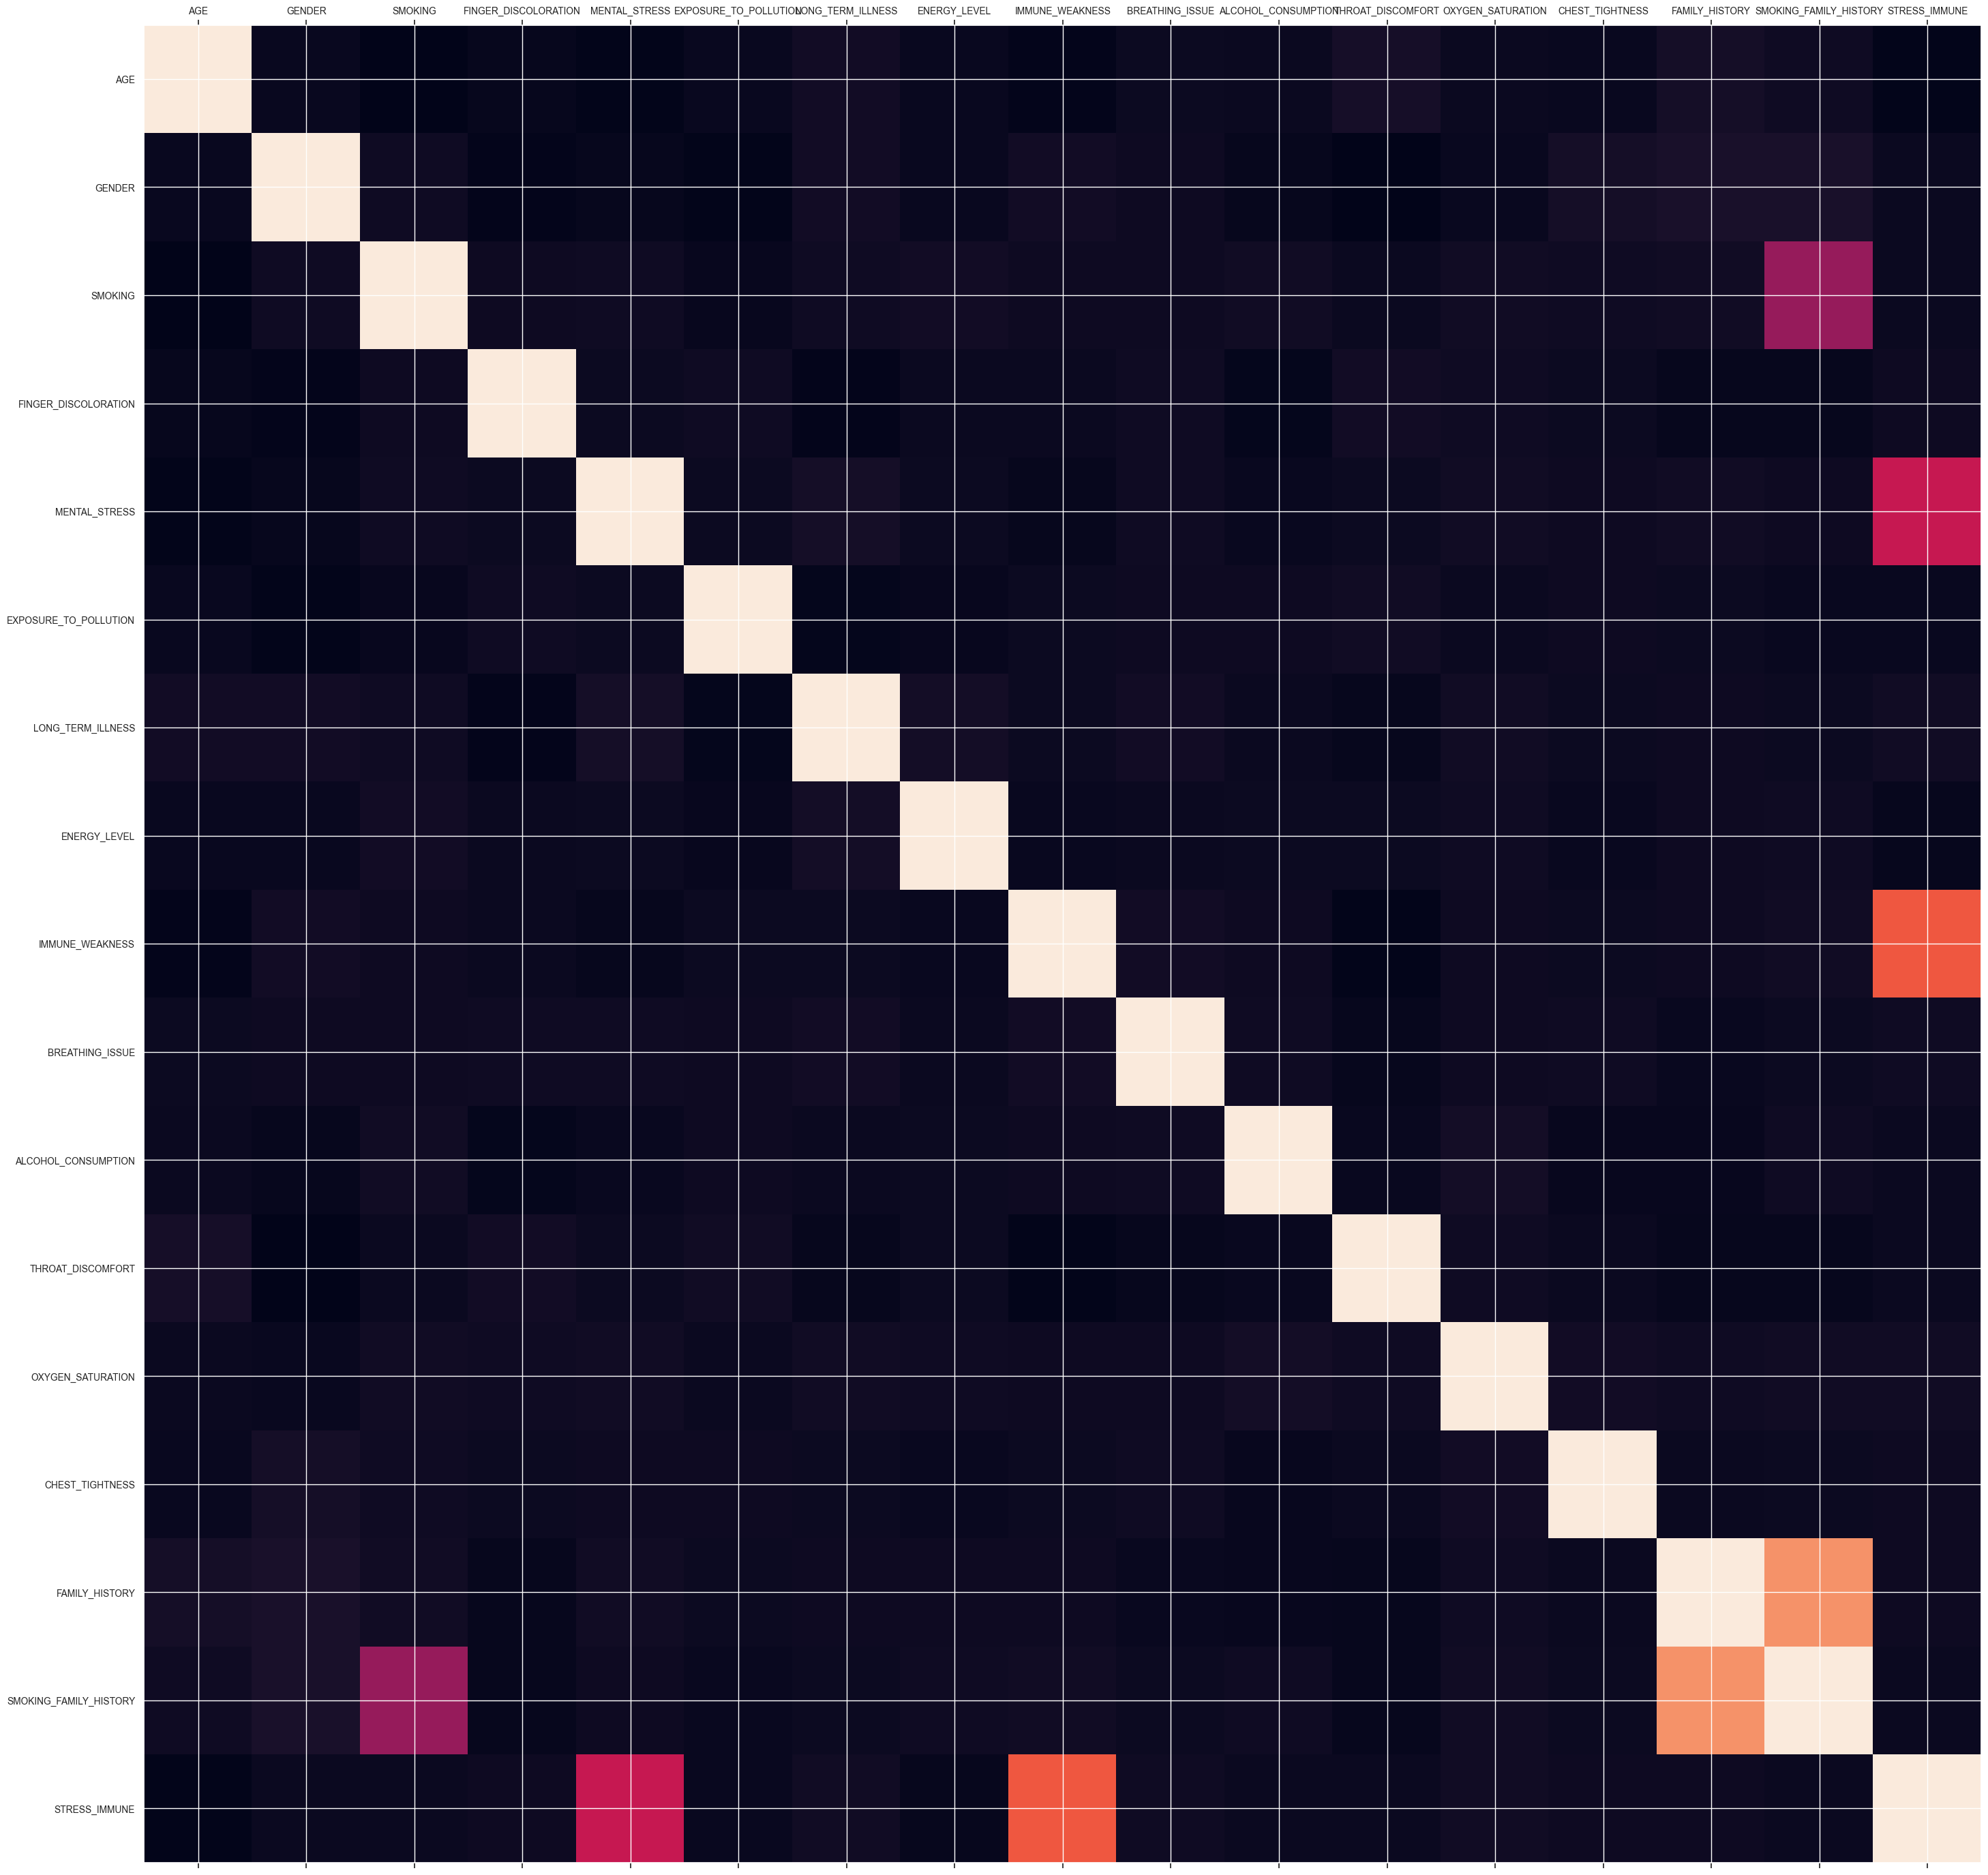

In [114]:
plot_corr(df_cancer.drop(columns='PULMONARY_DISEASE'))

### 3. Preparação dos Dados

In [109]:
x_features = df_cancer.iloc[:, 0:17].values
y_class = df_cancer.iloc[:, 17].values

x_features, y_class

(array([[68.,  1.,  1., ...,  0.,  0.,  0.],
        [81.,  1.,  1., ...,  0.,  0.,  0.],
        [58.,  1.,  1., ...,  0.,  0.,  0.],
        ...,
        [51.,  1.,  0., ...,  0.,  0.,  1.],
        [76.,  1.,  0., ...,  0.,  0.,  0.],
        [33.,  0.,  1., ...,  0.,  0.,  0.]], shape=(5000, 17)),
 array(['NO', 'YES', 'NO', ..., 'NO', 'NO', 'NO'],
       shape=(5000,), dtype=object))

In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
encoder = LabelEncoder()

x_features[:, 0] = encoder.fit_transform(x_features[:, 0])
x_features[:, 7] = encoder.fit_transform(x_features[:, 7])
x_features[:, 12] = encoder.fit_transform(x_features[:, 12])
y_class = encoder.fit_transform(y_class)


In [63]:
x_features, y_class

(array([[38.,  1.,  1., ...,  0.,  0.,  0.],
        [51.,  1.,  1., ...,  0.,  0.,  0.],
        [28.,  1.,  1., ...,  0.,  0.,  0.],
        ...,
        [21.,  1.,  0., ...,  0.,  0.,  1.],
        [46.,  1.,  0., ...,  0.,  0.,  0.],
        [ 3.,  0.,  1., ...,  0.,  0.,  0.]], shape=(5000, 17)),
 array([0, 1, 0, ..., 0, 0, 0], shape=(5000,)))

In [51]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_class, test_size=0.25)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3750, 17), (3750,), (1250, 17), (1250,))

### 4. Treinamento dos Modelos:

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV

In [55]:
model_naive = GaussianNB()
model_naive.fit(x_train, y_train)
predict_naive = model_naive.predict(x_test)

In [57]:
model_random = RandomForestClassifier(random_state=42)
model_random.fit(x_train, y_train)
predict_random = model_random.predict(x_test)

In [59]:
model_logistic = LogisticRegressionCV(random_state=42)
model_logistic.fit(x_train, y_train)
predict_logistic = model_logistic.predict(x_test)

### 5. Otimização dos Modelos:

In [53]:
def PerformanceMetrics(y_true, predict, class_name):
    import matplotlib.pyplot as plt
    import seaborn as sn
    from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
    

    # Imprime Matriz de Confusão:
    confusion_matrix_df = pd.DataFrame(
        confusion_matrix(y_true, predict), 
        index=class_name, 
        columns=class_name
    )

    plt.figure(figsize=(5,3))
    sn.set_theme(font_scale=0.9)
    sn.heatmap(confusion_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)


    # Imprime a Acurácia:
    print(f"A acurácia geral do modelo em relação a todos os dados foi de aproximadamente {accuracy_score(y_true, predict) * 100:.2f}%.")
    for i, label in enumerate(class_name):
        print(f"O modelo identificou corretamente {confusion_matrix_df.values[i][i]} registros com o rótulo '{label}'.")

    
    # Imprime Gráfico da Curva ROC
    fpr, tpr, thresholds = roc_curve(y_true, predict)
    auc = roc_auc_score(y_true, predict)
    plt.figure(figsize=(5,3))

    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  
    
    plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=12)
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=12)
    plt.title('Curva ROC', fontsize=14)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    print(classification_report(y_true, predict))

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 86.72%.
O modelo identificou corretamente 617 registros com o rótulo 'NO'.
O modelo identificou corretamente 467 registros com o rótulo 'YES'.


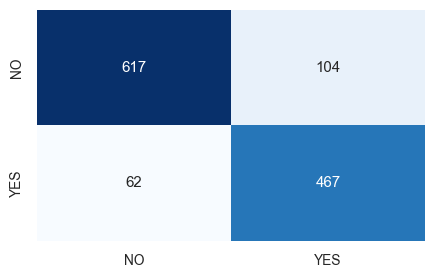

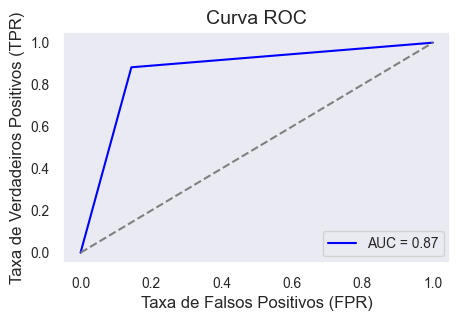

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       721
           1       0.82      0.88      0.85       529

    accuracy                           0.87      1250
   macro avg       0.86      0.87      0.87      1250
weighted avg       0.87      0.87      0.87      1250



In [56]:
PerformanceMetrics(y_test, predict_naive, ['NO', 'YES'])

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 89.92%.
O modelo identificou corretamente 664 registros com o rótulo 'NO'.
O modelo identificou corretamente 460 registros com o rótulo 'YES'.


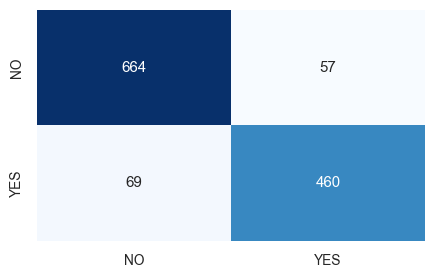

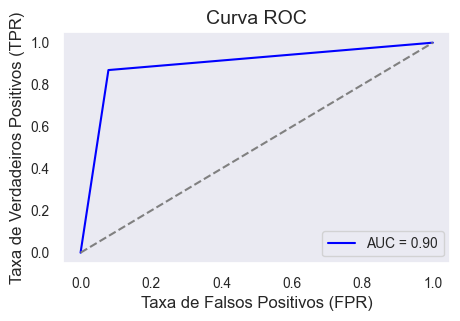

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       721
           1       0.89      0.87      0.88       529

    accuracy                           0.90      1250
   macro avg       0.90      0.90      0.90      1250
weighted avg       0.90      0.90      0.90      1250



In [58]:
PerformanceMetrics(y_test, predict_random, ['NO', 'YES'])

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 90.72%.
O modelo identificou corretamente 660 registros com o rótulo 'NO'.
O modelo identificou corretamente 474 registros com o rótulo 'YES'.


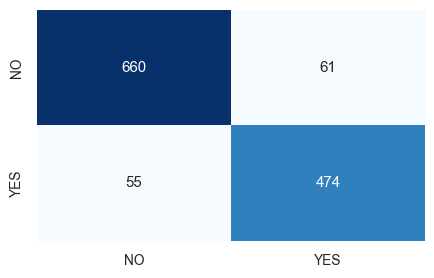

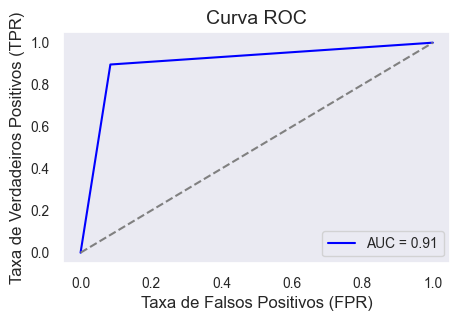

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       721
           1       0.89      0.90      0.89       529

    accuracy                           0.91      1250
   macro avg       0.90      0.91      0.91      1250
weighted avg       0.91      0.91      0.91      1250



In [60]:
PerformanceMetrics(y_test, predict_logistic, ['NO', 'YES'])